In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("../data/average-monthly-surface-temperature.csv")

In [16]:
pais = ["Libya"]
df_filtrado = df[df["Entity"].isin(pais)]

In [17]:
# Verificando se está pegando o pais de escolha
print(df_filtrado.head())

       Entity Code  year         Day  Average surface temperature daily  \
108120  Libya  LBY  1940  1940-01-15                          10.622398   
108121  Libya  LBY  1940  1940-02-15                          12.738207   
108122  Libya  LBY  1940  1940-03-15                          15.594740   
108123  Libya  LBY  1940  1940-04-15                          19.981180   
108124  Libya  LBY  1940  1940-05-15                          26.367147   

        Average surface temperature monthly  
108120                            20.251947  
108121                            20.251947  
108122                            20.251947  
108123                            20.251947  
108124                            20.251947  


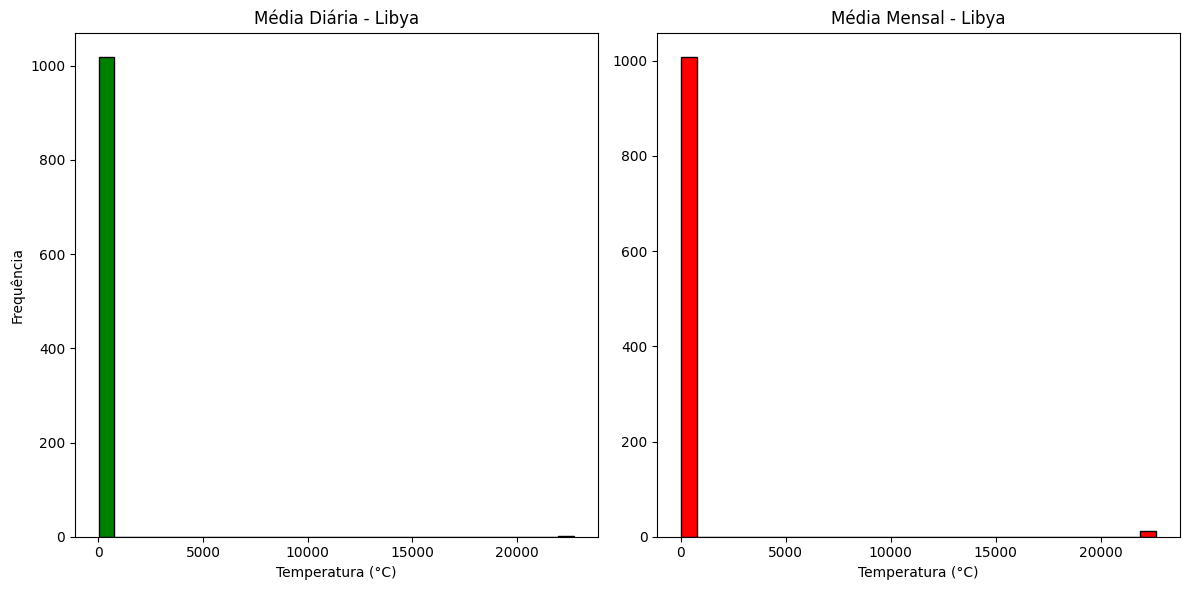

In [18]:
# Importar método de gerar histograma
from Funcoes import gerar_histogramas

# Gerar histograma do pais selecionado "Contém outliers"
gerar_histogramas("Libya", df_filtrado)

In [19]:
# Importar método de identificar outliers
from Funcoes import identificar_outliers

# Função para identificar outliers
outliers_diario = identificar_outliers(df_filtrado['Average surface temperature daily'], 1.7)
outliers_mensal = identificar_outliers(df_filtrado['Average surface temperature monthly'], 1.7)

# Printando os outliers
print(f"Outliers diários:\n {outliers_diario}")
print(f"\nOutliers mensais:\n {outliers_mensal}")

Outliers diários:
 108273    22736.0
Name: Average surface temperature daily, dtype: float64

Outliers mensais:
 109068    22648.0
109069    22648.0
109070    22648.0
109071    22648.0
109072    22648.0
109073    22648.0
109074    22648.0
109075    22648.0
109076    22648.0
109077    22648.0
109078    22648.0
109079    22648.0
Name: Average surface temperature monthly, dtype: float64


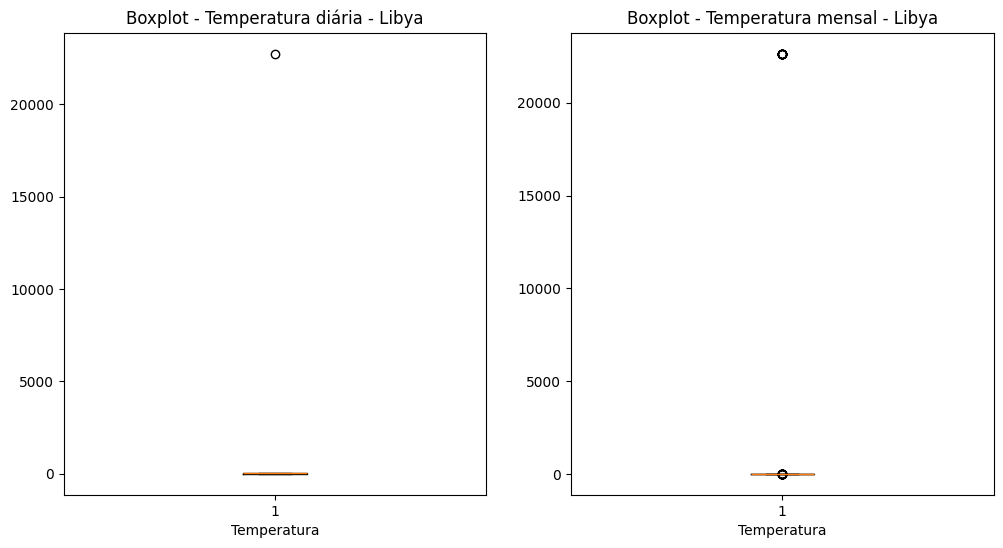

In [20]:
# Importar método de gerar boxplot "Contém outliers"
from Funcoes import gerar_boxplot

gerar_boxplot("Libya", df_filtrado)

In [21]:
# Importar método de remover outliers
from Funcoes import remover_outliers

# Remover outliers
temperatura_diaria_correta = remover_outliers(df_filtrado['Average surface temperature daily'], 1.7)
temperatura_mensal_correta = remover_outliers(df_filtrado['Average surface temperature monthly'], 1.7)

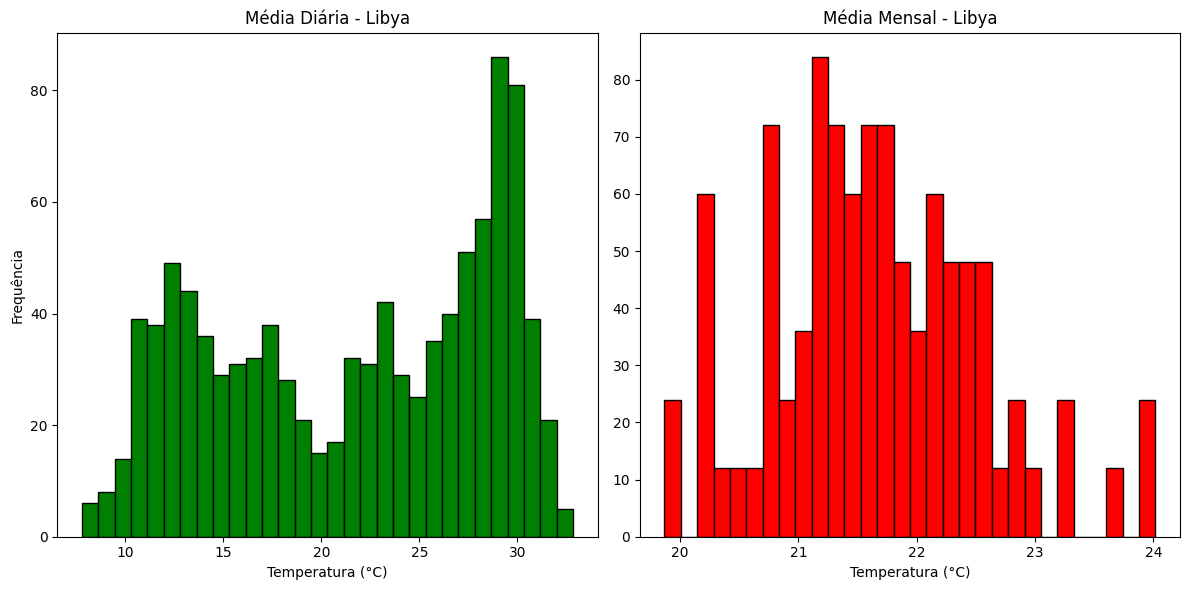

In [22]:
# Criar dataframe com os dados sem outliers
dados_pais_correto = pd.DataFrame({
    'Entity': 'Libya',
    'Day': df_filtrado['Day'],
    'Average surface temperature daily': temperatura_diaria_correta,
    'Average surface temperature monthly': temperatura_mensal_correta
})

# Gerar histograma do pais selecionado sem outliers
gerar_histogramas('Libya', dados_pais_correto)

In [23]:
# OBS: Esse pais tem muito outliers. Pode haver inconsistência!!!

In [24]:
# Importar metódo de análise de periodo
from Funcoes import analisar_periodo

mes_inicial, mes_final = analisar_periodo(dados_pais_correto, 'Day')

print("-" * 100)


Período de análise:
Primeiro mês: 1940-01
Último mês: 2024-12
----------------------------------------------------------------------------------------------------


In [25]:
# Importar função para identificação de meses faltantes
from Funcoes import identificar_meses_faltantes

identificar_meses_faltantes(dados_pais_correto)


Numero de meses faltante: 0
Meses faltante: 
